# Building_Gas_Consumption_For_Space_heating 


## objective

### Predicting gas consumption of a building for a year, month, day... 
#### ApparentZenith, Azimuth, DiffuseHorizontalIrradiance,DirectNormalIrradiance,DirectNormalIrradianceExtra, 	 GlobalHorizontalIrradiance,Residence Temperature, SolarGainThroughWindows, TemperatureOutside,	MassflowOutputTemperature. 	



In [1]:
# will use the pandas library for data analysis and manipulation
import pandas as pd 

# Often we need some functions from numpy for adding support for large, multi-dimensional arrays and matrices.
import numpy as np 

# For data visualization, we import matplotlib
import matplotlib.pyplot as plt 

### Load the building electricity consumption data



In [2]:
# Load the building electricity consumption data
GasDemand1 = pd.read_excel("C:\Energy demand prediction of a building with Machine learning in Python\Final\hourly data\GasDemand_GasHeater.xlsx")

In [3]:
# set time column as index
GasDemand1 = GasDemand1.set_index("Time")
GasDemand1 

,GasHeater - GasDemand [Gas - kWh]
Time,
2019-01-01 00:00:00,0
2019-01-01 00:15:00,0
2019-01-01 00:30:00,0
2019-01-01 00:45:00,0
2019-01-01 01:00:00,0
...,...
2019-12-31 22:45:00,0
2019-12-31 23:00:00,0
2019-12-31 23:15:00,0


In [4]:
# Check the description of the data
GasDemand1.describe()

,GasHeater - GasDemand [Gas - kWh]
count,35040.000000
mean,1245.205479
std,3449.350960
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10800.000000


In [7]:
#Load the Weather and building data from the excel file
Path= "C:\Energy demand prediction of a building with Machine learning in Python\Final\hourly data\EdinVV.xlsx"
knmi= pd.read_excel(Path)
knmi


,Time,Month,Day,HH,Minute,ApparentZenith,Azimuth,DiffuseHorizontalIrradiance,DirectNormalIrradiance,DirectNormalIrradianceExtra,GlobalHorizontalIrradiance,Residence Temperature,SolarGainThroughWindows,TemperatureOutside,MassflowOutputTemperature
0,2019-01-01 00:00:00,1,1,0,0,144.902780,331.852779,0.0,0.0,1413.981805,0.0,22.899766,0.0,1.376667,49.978038
1,2019-01-01 00:15:00,1,1,0,15,145.800235,337.712843,0.0,0.0,1413.981805,0.0,22.814577,0.0,4.326667,49.956095
2,2019-01-01 00:30:00,1,1,0,30,146.494662,343.779957,0.0,0.0,1413.981805,0.0,22.736763,0.0,5.736667,49.934171
3,2019-01-01 00:45:00,1,1,0,45,146.971912,350.009381,0.0,0.0,1413.981805,0.0,22.657607,0.0,5.386667,49.912267
4,2019-01-01 01:00:00,1,1,1,0,147.221591,356.344036,0.0,0.0,1413.981805,0.0,22.577115,0.0,5.036667,49.890382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 22:45:00,12,31,22,45,138.016460,306.322580,0.0,0.0,1413.940576,0.0,13.707344,0.0,0.373333,44.163541
35036,2019-12-31 23:00:00,12,31,23,0,139.662710,310.929172,0.0,0.0,1413.940576,0.0,13.707051,0.0,0.423333,43.601242
35037,2019-12-31 23:15:00,12,31,23,15,141.194849,315.781644,0.0,0.0,1413.940576,0.0,13.706567,0.0,0.473333,43.038890
35038,2019-12-31 23:30:00,12,31,23,30,142.595546,320.890948,0.0,0.0,1413.940576,0.0,13.706317,0.0,0.500000,44.516484


In [8]:
#Set the Time column as index
knmi = knmi.set_index('Time')
knmi

,Month,Day,HH,Minute,ApparentZenith,Azimuth,DiffuseHorizontalIrradiance,DirectNormalIrradiance,DirectNormalIrradianceExtra,GlobalHorizontalIrradiance,Residence Temperature,SolarGainThroughWindows,TemperatureOutside,MassflowOutputTemperature
Time,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,1,0,0,144.902780,331.852779,0.0,0.0,1413.981805,0.0,22.899766,0.0,1.376667,49.978038
2019-01-01 00:15:00,1,1,0,15,145.800235,337.712843,0.0,0.0,1413.981805,0.0,22.814577,0.0,4.326667,49.956095
2019-01-01 00:30:00,1,1,0,30,146.494662,343.779957,0.0,0.0,1413.981805,0.0,22.736763,0.0,5.736667,49.934171
2019-01-01 00:45:00,1,1,0,45,146.971912,350.009381,0.0,0.0,1413.981805,0.0,22.657607,0.0,5.386667,49.912267
2019-01-01 01:00:00,1,1,1,0,147.221591,356.344036,0.0,0.0,1413.981805,0.0,22.577115,0.0,5.036667,49.890382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,12,31,22,45,138.016460,306.322580,0.0,0.0,1413.940576,0.0,13.707344,0.0,0.373333,44.163541
2019-12-31 23:00:00,12,31,23,0,139.662710,310.929172,0.0,0.0,1413.940576,0.0,13.707051,0.0,0.423333,43.601242
2019-12-31 23:15:00,12,31,23,15,141.194849,315.781644,0.0,0.0,1413.940576,0.0,13.706567,0.0,0.473333,43.038890


In [9]:
knmi.columns

Index(['Month', 'Day', 'HH', 'Minute', 'ApparentZenith ', 'Azimuth ',
       'DiffuseHorizontalIrradiance ', 'DirectNormalIrradiance',
       'DirectNormalIrradianceExtra ', ' GlobalHorizontalIrradiance',
       ' Residence Temperature ', 'SolarGainThroughWindows ',
       'TemperatureOutside', 'MassflowOutputTemperature '],
      dtype='object')

In [10]:
#concatenating the datasets of weather/building data and gas consumption
df = pd.concat([knmi, GasDemand1], axis=1) #axis =1 for considering the columns
df

# replace NaN values with 0:
df.fillna(0)
df.replace(np.nan, 0)

,Month,Day,HH,Minute,ApparentZenith,Azimuth,DiffuseHorizontalIrradiance,DirectNormalIrradiance,DirectNormalIrradianceExtra,GlobalHorizontalIrradiance,Residence Temperature,SolarGainThroughWindows,TemperatureOutside,MassflowOutputTemperature,GasHeater - GasDemand [Gas - kWh]
Time,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,1,0,0,144.902780,331.852779,0.0,0.0,1413.981805,0.0,22.899766,0.0,1.376667,49.978038,0
2019-01-01 00:15:00,1,1,0,15,145.800235,337.712843,0.0,0.0,1413.981805,0.0,22.814577,0.0,4.326667,49.956095,0
2019-01-01 00:30:00,1,1,0,30,146.494662,343.779957,0.0,0.0,1413.981805,0.0,22.736763,0.0,5.736667,49.934171,0
2019-01-01 00:45:00,1,1,0,45,146.971912,350.009381,0.0,0.0,1413.981805,0.0,22.657607,0.0,5.386667,49.912267,0
2019-01-01 01:00:00,1,1,1,0,147.221591,356.344036,0.0,0.0,1413.981805,0.0,22.577115,0.0,5.036667,49.890382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,12,31,22,45,138.016460,306.322580,0.0,0.0,1413.940576,0.0,13.707344,0.0,0.373333,44.163541,0
2019-12-31 23:00:00,12,31,23,0,139.662710,310.929172,0.0,0.0,1413.940576,0.0,13.707051,0.0,0.423333,43.601242,0
2019-12-31 23:15:00,12,31,23,15,141.194849,315.781644,0.0,0.0,1413.940576,0.0,13.706567,0.0,0.473333,43.038890,0


In [11]:
# check missing data status
df.isna().sum()

Month                                0
Day                                  0
HH                                   0
Minute                               0
ApparentZenith                       0
Azimuth                              0
DiffuseHorizontalIrradiance          0
DirectNormalIrradiance               0
DirectNormalIrradianceExtra          0
 GlobalHorizontalIrradiance          0
 Residence Temperature               0
SolarGainThroughWindows              0
TemperatureOutside                   0
MassflowOutputTemperature            0
GasHeater - GasDemand [Gas - kWh]    0
dtype: int64

<AxesSubplot:>

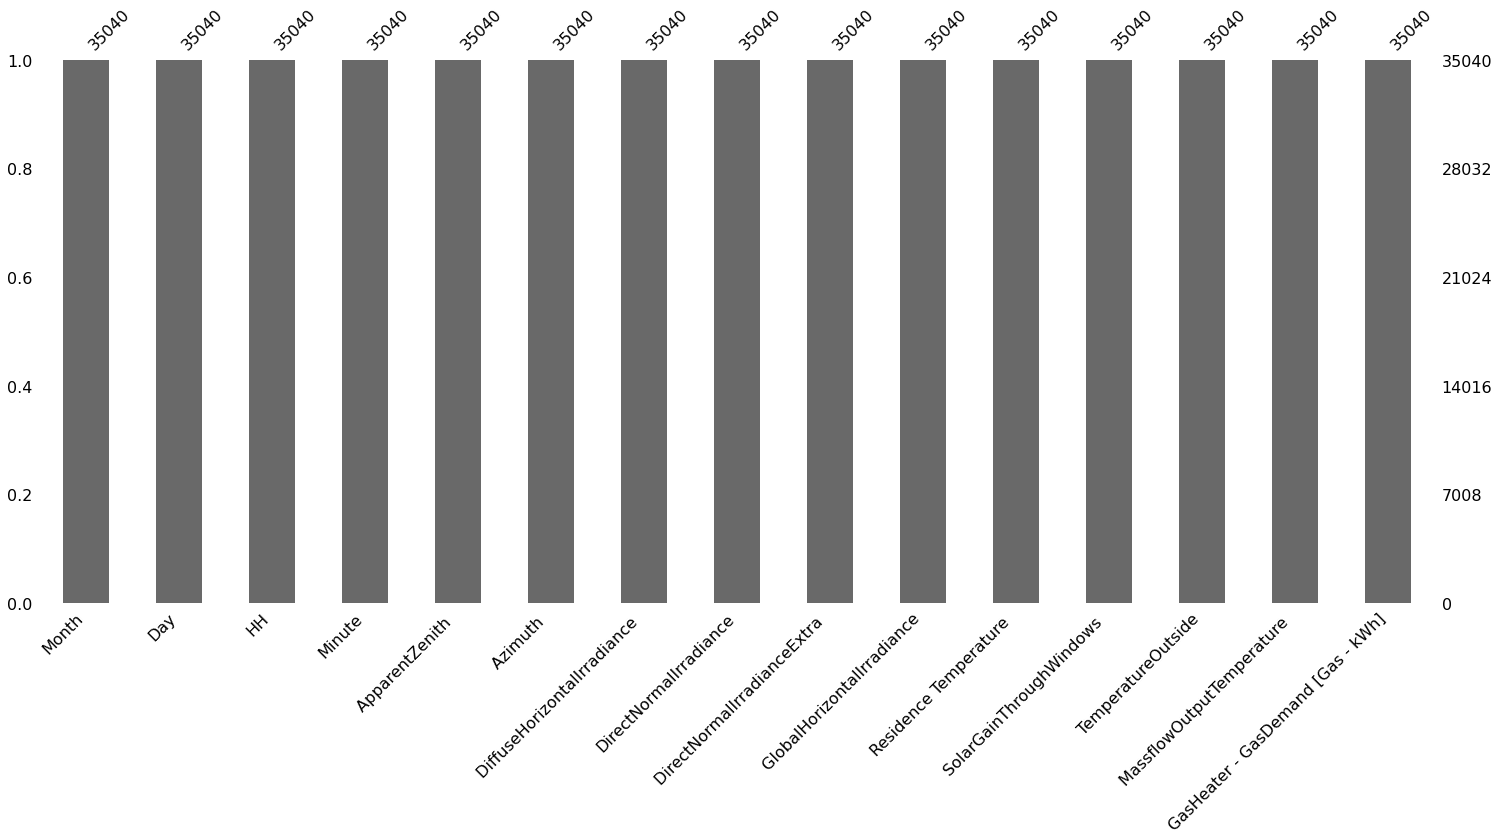

In [12]:
# cross check the availability of the data with missingno library
import missingno as msno
msno.bar(df)

In [13]:
# We have no missing values in the dataframe. Our output (dependent variable) is GasHeater - GasDemand [Gas - kWh] column. other columns of the data set are independent values.
#We can find strong and weak correlation with different variables. With .corr() method, we can utilize Pearson's correlation coefficient which is a measure of the strength of a linear association between two variables.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'Month'),
  Text(1.5, 0, 'Day'),
  Text(2.5, 0, 'HH'),
  Text(3.5, 0, 'Minute'),
  Text(4.5, 0, 'ApparentZenith '),
  Text(5.5, 0, 'Azimuth '),
  Text(6.5, 0, 'DiffuseHorizontalIrradiance '),
  Text(7.5, 0, 'DirectNormalIrradiance'),
  Text(8.5, 0, 'DirectNormalIrradianceExtra '),
  Text(9.5, 0, ' GlobalHorizontalIrradiance'),
  Text(10.5, 0, ' Residence Temperature '),
  Text(11.5, 0, 'SolarGainThroughWindows '),
  Text(12.5, 0, 'TemperatureOutside'),
  Text(13.5, 0, 'MassflowOutputTemperature '),
  Text(14.5, 0, 'GasHeater - GasDemand [Gas - kWh]')])

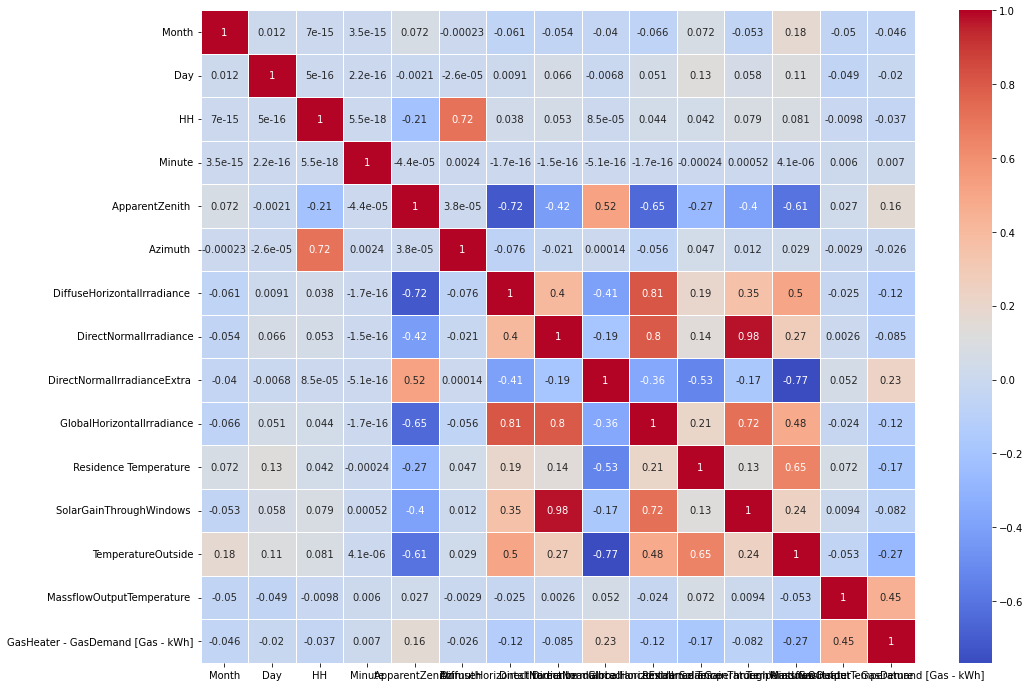

In [14]:
plt.figure(figsize = (16,12))#tplotlib figure
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')

In [15]:
# From the heaat map, we see Direct Normal Irradiance Extra orrelates very positively with building gas demand.
# ApparentZenith and Apparent Zenith  are two highest negatively correlated features. 
# in addition, both of these features are also multi-collinear. Which means, either of them can be utilized for predicting gas demand.

# Plot Gas consumption data against Direct Normal Irradiance Extra and Apparent Zenith.

In [16]:
# Resample the energy of the building over a week using the resmaple function and the mean  function. 
df_sum_weekly = df['GasHeater - GasDemand [Gas - kWh]'].resample('W').mean()

 
# Resample the temperature over a week. 
df_feature1= df["DirectNormalIrradianceExtra "].resample("W").mean()

# Resample the relative humidity over a week. 
df_feature2 = df["ApparentZenith "].resample("W").mean()


C:\Users\s2124309\AppData\Local\Temp\ipykernel_644\3350970459.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


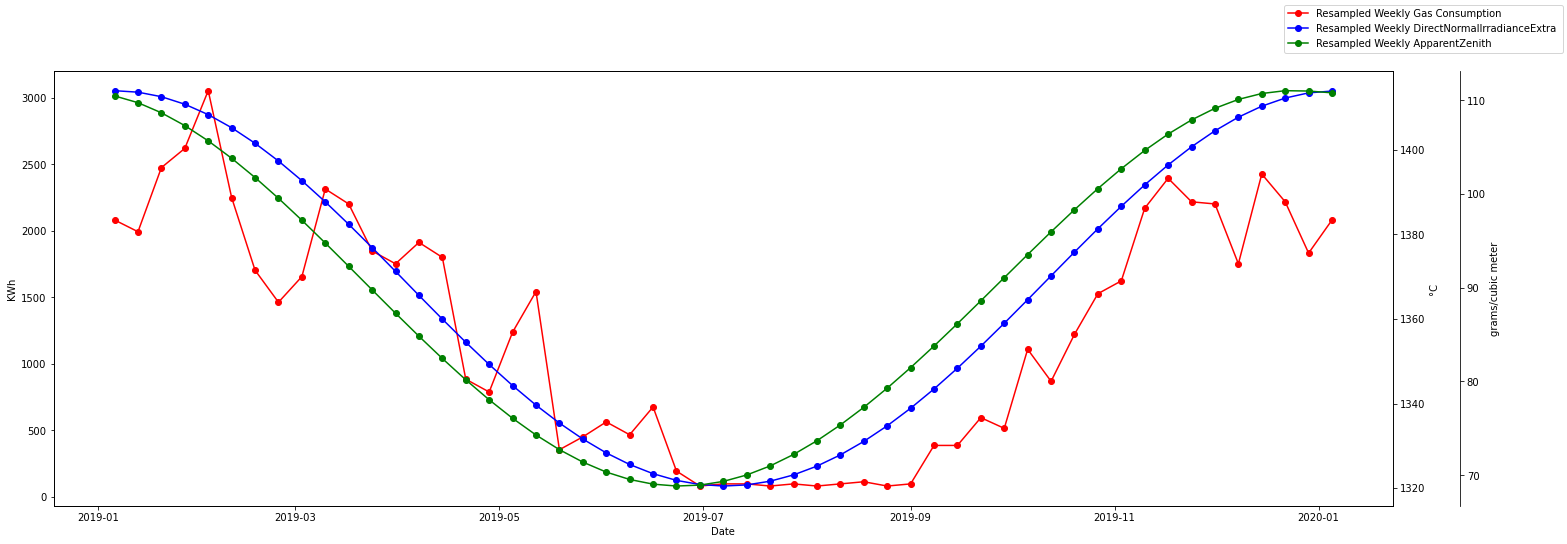

In [17]:
# plot the result
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_sum_weekly.index, df_sum_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
ax3 = ax.twinx()
ax2.plot(df_sum_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(df_sum_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", 1.05))
fig.legend(["Resampled Weekly Gas Consumption","Resampled Weekly DirectNormalIrradianceExtra ","Resampled Weekly ApparentZenith "], loc='upper right')
fig.show()

# Feature selection


# Exploring non-linear correlation between Gas with Hour and Month


In [18]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

#filter columns from dataframe
gasDemand = np.array(df["GasHeater - GasDemand [Gas - kWh]"]) 
hour = np.array(df["HH"])
month= np.array(df["Month"])

# calculate spearman's correlation
corr1, _ = spearmanr(gasDemand, hour)
corr2,_ = spearmanr(gasDemand, month)
print('Spearmans correlation between GasDemand and hour feature: %.3f' % corr1)
print('Spearmans correlation between GasDemand and month feature: %.3f' % corr2)

Spearmans correlation between GasDemand and hour feature: -0.037
Spearmans correlation between GasDemand and month feature: -0.045


In [19]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model.
knmi_updated= knmi.loc[:, ~knmi.columns.isin(['HH','Minute',
                                              "Azimuth ","DiffuseHorizontalIrradiance ","GlobalHorizontalIrradiance ",
                                             'HeatingByResidents '])] # ~ sign drops the columns we select
knmi_updated

,Month,Day,ApparentZenith,DirectNormalIrradiance,DirectNormalIrradianceExtra,GlobalHorizontalIrradiance,Residence Temperature,SolarGainThroughWindows,TemperatureOutside,MassflowOutputTemperature
Time,,,,,,,,,,
2019-01-01 00:00:00,1,1,144.902780,0.0,1413.981805,0.0,22.899766,0.0,1.376667,49.978038
2019-01-01 00:15:00,1,1,145.800235,0.0,1413.981805,0.0,22.814577,0.0,4.326667,49.956095
2019-01-01 00:30:00,1,1,146.494662,0.0,1413.981805,0.0,22.736763,0.0,5.736667,49.934171
2019-01-01 00:45:00,1,1,146.971912,0.0,1413.981805,0.0,22.657607,0.0,5.386667,49.912267
2019-01-01 01:00:00,1,1,147.221591,0.0,1413.981805,0.0,22.577115,0.0,5.036667,49.890382
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,12,31,138.016460,0.0,1413.940576,0.0,13.707344,0.0,0.373333,44.163541
2019-12-31 23:00:00,12,31,139.662710,0.0,1413.940576,0.0,13.707051,0.0,0.423333,43.601242
2019-12-31 23:15:00,12,31,141.194849,0.0,1413.940576,0.0,13.706567,0.0,0.473333,43.038890


# Now develop a machine learning regression model based on the weather parameters to predict the Gas consumption for heating ther building.

In [20]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split

# Scaling to improve the model performance


In [21]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
from sklearn.preprocessing import MinMaxScaler #normalizes the data and brings the values between 0 (lowest value) and 1 (highest value)
from sklearn.preprocessing import RobustScaler #standardizes the data. But is more robust to outliers because it only scales the data according to the Interquartile Range (IQR) between the 1st and 3rd quartile.

#Generate the scaler
sc1= StandardScaler()
sc2= MinMaxScaler()
sc3= RobustScaler()

In [22]:
#Scaling the input data
X1 = sc1.fit_transform(knmi_updated)
X2 = sc2.fit_transform(knmi_updated)
X3 = sc3.fit_transform(knmi_updated)

#We do not need to scale the output data as we have only one output.

C:\ProgramData\Anaconda3\envs\osm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\osm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\osm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

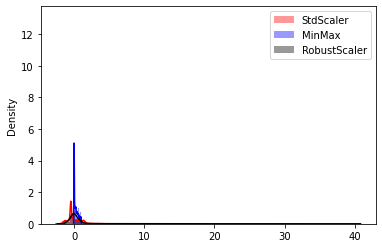

In [23]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="StdScaler")
sns.distplot(X2,color="blue",label="MinMax")
sns.distplot(X3,color="black",label="RobustScaler")
plt.legend()

  
# Check the RF regressor model performance


In [26]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score #(coefficient of determination) regression score function.
from sklearn.metrics import mean_squared_error #The MSE indicates the average distance of the best fit regression line to the observed values.

In [37]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=11
                              , random_state=0)

# fitting the regression model to the training data
X_train, X_test, y_train, y_test = train_test_split(X1, GasDemand1, test_size=0.4, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
RFReg.fit(X_train, y_train)

#Predicting on the training data
pred= RFReg.predict(X_test)

#Caculating R2 score and Root mean square error
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.972294886807172
324111.61524584156


Text(0, 0.5, 'kWh')

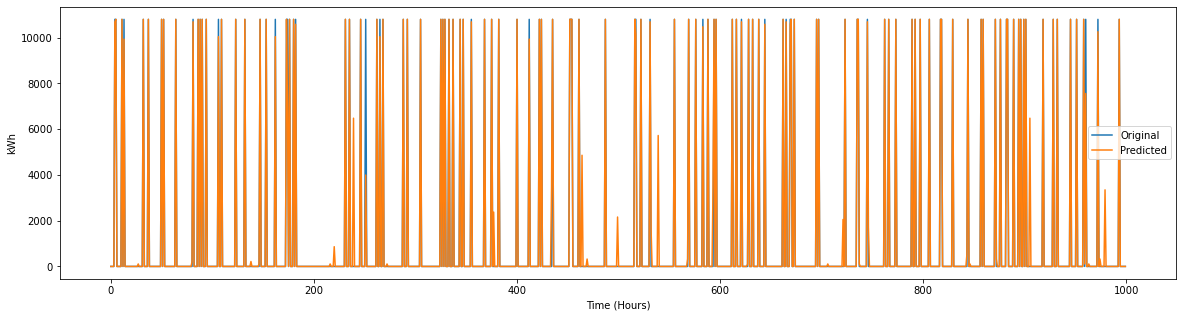

In [38]:
plt.figure(figsize = (20,5))
plt.plot(y_test2[:1000], label="Original")
plt.plot(pred[:1000], label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')

Text(0, 0.5, 'kWh')

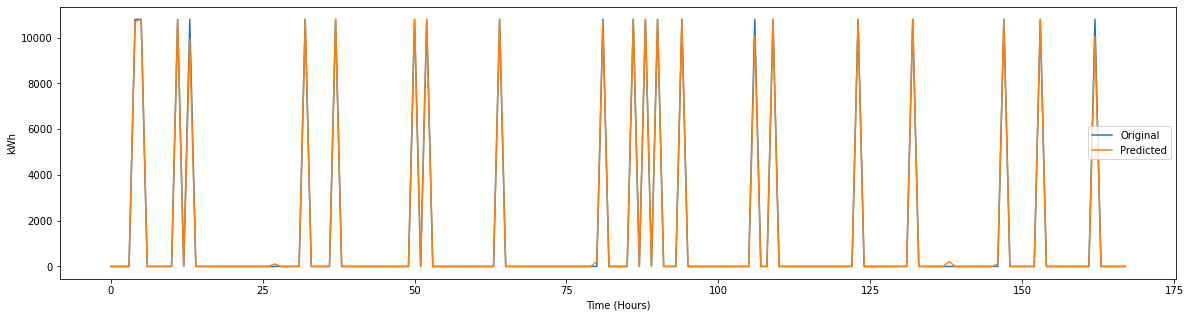

In [39]:
plt.figure(figsize = (20,5))
plt.plot(y_test2[:168], label="Original")
plt.plot(pred[:168], label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')

In [40]:
from sklearn.model_selection import GridSearchCV

In [36]:
#settings for hyperparameters
check_parameters = {'max_depth':[8,9,11,12]}

gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'max_depth': 11}


# Allocate peak house useage, using predictive modeling

### To Do 


In [ ]:
# Import the weather cost file
#path= "C:\Energy demand prediction of a building with Machine learning in Python\GasPeakDemand.xlsx"
#GasPeakDemand= pd.read_excel(path)
#GasPeakDemand

In [ ]:
#remove relative humidity column from the data set
GasPeakDemand_updated= GasPeakDemand.loc[:, ~GasPeakDemand.columns.isin(['-4.5°C to -1.5°C'])]